<a href="https://colab.research.google.com/github/AdityaaRavi/Butterfly-cnn/blob/preprocessing/Butteryfly_cnn_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the data

## downloading

In [1]:
!mkdir /content/butterfly-data

In [2]:
# get the kaggle api token
!mkdir ~/.kaggle
file_id = "1zSRznA3TypBwqP75WcOuv6X3tbaYDiNJ"
file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id
!wget -O ~/.kaggle/kaggle.json --no-check-certificate "$file_download_link"
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list > datasets.txt
!head 5 datasets.txt
!pip install tensorflow_io

--2022-11-24 03:38:33--  https://docs.google.com/uc?export=download&id=1zSRznA3TypBwqP75WcOuv6X3tbaYDiNJ
Resolving docs.google.com (docs.google.com)... 142.250.148.101, 142.250.148.138, 142.250.148.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.148.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5psstn07l6fgh0mf9lo7nc9ib2s5a3fe/1669261050000/09300047399178709700/*/1zSRznA3TypBwqP75WcOuv6X3tbaYDiNJ?e=download&uuid=45f9bfed-d219-4197-91e7-1bef7d015843 [following]
--2022-11-24 03:38:33--  https://doc-10-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5psstn07l6fgh0mf9lo7nc9ib2s5a3fe/1669261050000/09300047399178709700/*/1zSRznA3TypBwqP75WcOuv6X3tbaYDiNJ?e=download&uuid=45f9bfed-d219-4197-91e7-1bef7d015843
Resolving doc-10-bk-docs.googleusercontent.com (doc-10-bk-docs.googleusercontent.com)... 173.194.196.132, 2607:

In [3]:
!kaggle datasets download -d gpiosenka/butterfly-images40-species -p /content/butterfly-data/ --unzip

 98% 446M/454M [00:02<00:00, 168MB/s]
100% 454M/454M [00:02<00:00, 193MB/s]


# Constants

In [4]:
BATCH_SIZE = 128
CHANNELS = 3
IMAGE_SIZE = 224

## loading the data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
from tensorflow.keras import models, layers, preprocessing, Sequential
import tensorflow.keras

print("Training Data:\n---------------")
training_data = preprocessing.image_dataset_from_directory(
    "/content/butterfly-data/train", 
    batch_size=BATCH_SIZE, 
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

print("\n\nTesting Data:\n---------------")
testing_data = preprocessing.image_dataset_from_directory(
    "/content/butterfly-data/test", 
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)
print("\n\nValidation Data:\n---------------")
validation_data = preprocessing.image_dataset_from_directory(
    "/content/butterfly-data/valid", 
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True
)

/usr/local/lib/python3.7/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.7/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.7/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.7/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.7/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.7/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10unique_

Training Data:
---------------
Found 12639 files belonging to 100 classes.


Testing Data:
---------------
Found 500 files belonging to 100 classes.


Validation Data:
---------------
Found 500 files belonging to 100 classes.


In [6]:
# checking if the data 
classes = training_data.class_names
print(
    "Num classes: ", len(classes),
    "\nClass Names: ", classes
)

Num classes:  100 
Class Names:  ['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN ARGUS', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH', 'CLEARWING MOTH', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMET MOTH', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'EMPEROR GUM MOTH', 'GARDEN TIGER MOTH', 'GIANT LEOPARD MOTH', 'GLITTERING SAPPHIRE', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREEN HAIRSTREAK', 'GREY HAIRSTREAK', 'HERCULES MOTH', 'HUMMING BIRD HAWK MOTH', 'INDRA 

# Data Exploration

We convert all values to grayscale since butterflies tend to be more colorful, having a high RGB value as compared to moths. The neural network will favor higher values of RGB/brighter images compared to the lower values of RGB/darker images. This can be seen in butterflies which tend to be brighter than moths, so the network would prefer butterfly images over moth images. 
High RGB → higher grayscale value. Similarly the other way around.
To avoid skewing the ML model, we convert them to grayscale, and to make our model run efficiently and effectively we add them up and average them out. 


In [7]:
from tensorflow.image import rgb_to_grayscale
import cv2
mean_array = []
#laplacian_array = []
for images, labels in training_data.as_numpy_iterator():
    for image in images:
        mean_array.append(np.asarray(rgb_to_grayscale(image)).reshape(-1, 1).mean())
        #laplacian_array.append(np.asarray(np.random.laplace(image)).reshape(-1, 1).var())

All the grayscale averages will then be added to an array for further use. Let’s call that the mean_array. Using the mean_array, we will compute useful values such as the mean, median, standard deviation, min, and max values. These values help us better understand the distribution of the data.

In [8]:
len(mean_array)

12639

In [9]:
#len(laplacian_array)

In [10]:
mean_array[:5]

[152.81578, 181.31749, 110.83524, 112.93887, 68.25804]

In [11]:
#laplacian_array[:5]

In [12]:
mean_array = np.asarray(mean_array)
median = np.median(mean_array)
std_dev = np.std(mean_array)
min = mean_array.min()
max = mean_array.max()
mean = np.mean(mean_array)

# laplacian_array = np.asarray(laplacian_array)
# lap_median = np.median(laplacian_array)
# lap_std_dev = np.std(laplacian_array)
# lap_min = laplacian_array.min()
# lap_max = laplacian_array.max()
# lap_mean = np.mean(laplacian_array)

In [13]:
print(
    "\nImage Grayscale Values:",
    "\n----------", 
    "\n\tMean: ", mean,
    "\n\tMedian: ", median,
    "\n\tStandard Deviation: ", std_dev,
    "\n\tMinimum: ", min,
    "\n\tMaximum: ", max
)
# print(
#     "\nImage Laplacian Values:",
#     "\n----------", 
#     "\n\tMean: ", lap_mean,
#     "\n\tMedian: ", lap_median,
#     "\n\tStandard Deviation: ", lap_std_dev,
#     "\n\tMinimum: ", lap_min,
#     "\n\tMaximum: ", lap_max
# )


Image Grayscale Values: 
---------- 
	Mean:  116.32708 
	Median:  114.14225 
	Standard Deviation:  29.468502 
	Minimum:  13.593116 
	Maximum:  242.44257


The min and max values show that our dataset is evenly distributed. We can also see that our mean is close to the center-most value which shows us that there are minimal outliers.

# Plotting the images

We plot a random image of each class of butterflies and moths from the training dataset. This stands as a visual representation of the data we have so that it makes visualization easier.

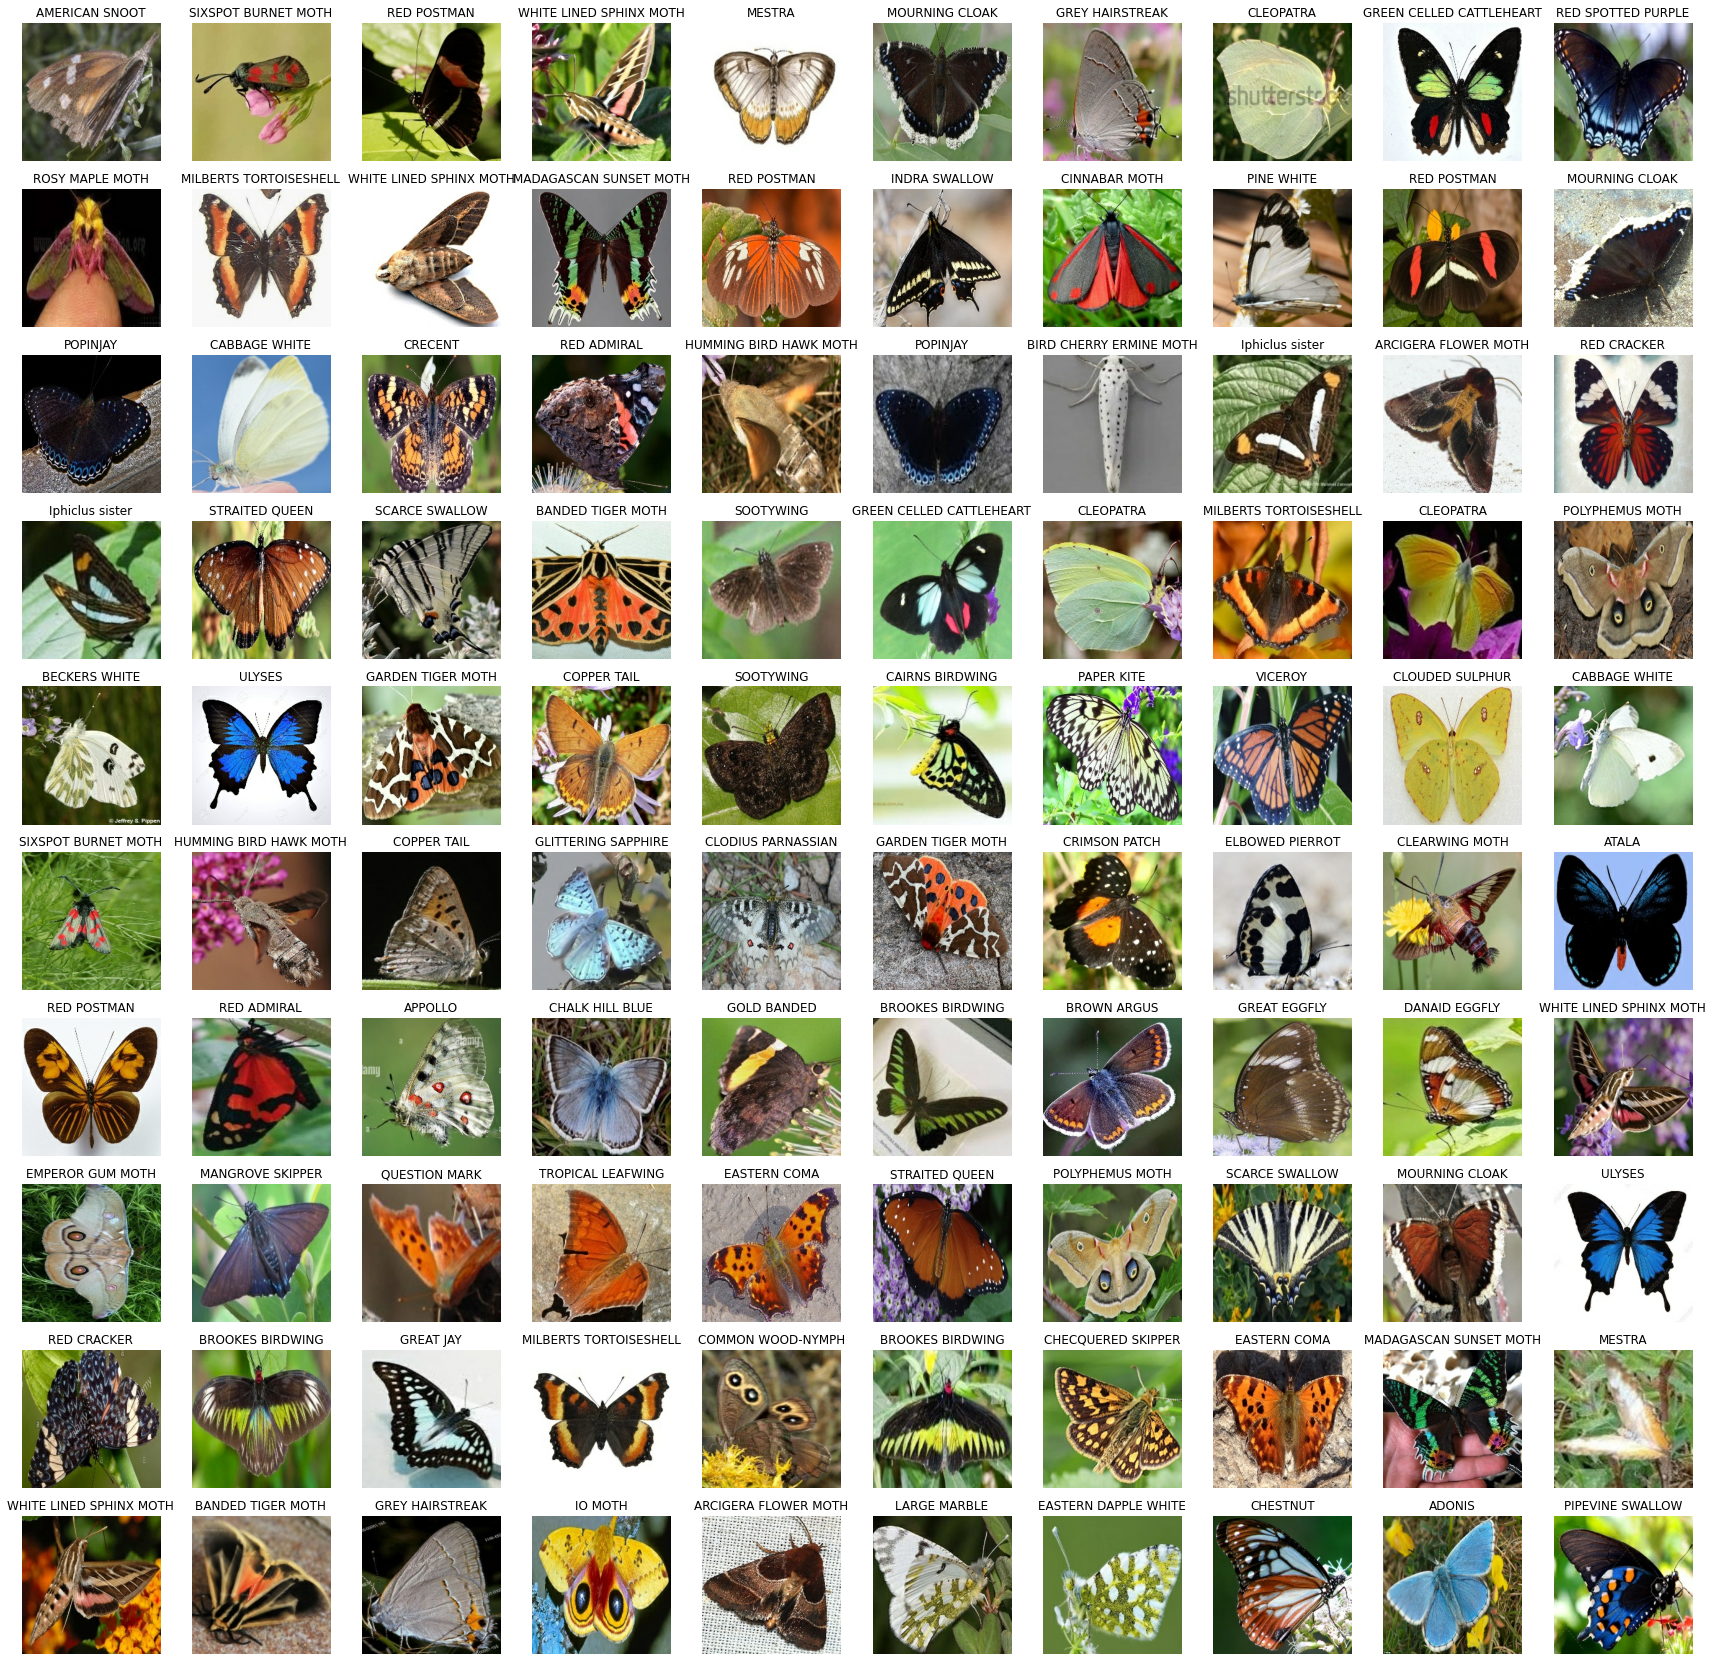

In [31]:
plt.figure(figsize=(30,30))
for images, labels in training_data.take(1):
    #print(labels)
    for j in range(100):
        axis = plt.subplot(10, 10, j + 1)
        plt.imshow(np.asarray(images[j]).astype("uint8"))
        plt.title(classes[labels[j]])
        plt.axis("off")

# Preprocessing

In [25]:
data_preprocessing = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    #layers.GaussianNoise(2.0),
    #tfio.experimental.filter.laplacian()
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomCrop(IMAGE_SIZE, IMAGE_SIZE)
])

In [26]:
training_data = training_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
INPUT_SHAPE = (128, IMAGE_SIZE, IMAGE_SIZE, 3)
model = models.Sequential([
    data_preprocessing,
    layers.Conv2D(128, (3,3), activation = 'relu', input_shape = INPUT_SHAPE),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16, (3,3), activation = 'relu'),
    layers.Flatten(),
    layers.Dense(units = 128, activation = 'relu'),
    #layers.Dense(units = 500, activation = 'relu'),
    layers.Dense(units = 100, activation = 'sigmoid')
])

In [28]:
model.build(input_shape = INPUT_SHAPE)

In [29]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(), 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [30]:
model.fit(training_data, batch_size = BATCH_SIZE, validation_data = validation_data, epochs = 10)

Epoch 1/10
99/99 [==============================] - 51s 500ms/step - loss: 4.0542 - accuracy: 0.0814 - val_loss: 3.3147 - val_accuracy: 0.1880
Epoch 2/10
99/99 [==============================] - 49s 495ms/step - loss: 2.9329 - accuracy: 0.2662 - val_loss: 2.4942 - val_accuracy: 0.3700
Epoch 3/10
99/99 [==============================] - 49s 495ms/step - loss: 2.3466 - accuracy: 0.3900 - val_loss: 2.1438 - val_accuracy: 0.4280
Epoch 4/10
99/99 [==============================] - 49s 492ms/step - loss: 2.0592 - accuracy: 0.4541 - val_loss: 1.9057 - val_accuracy: 0.4880
Epoch 5/10
99/99 [==============================] - 49s 492ms/step - loss: 1.8734 - accuracy: 0.5048 - val_loss: 1.6799 - val_accuracy: 0.5180
Epoch 6/10
99/99 [==============================] - 49s 494ms/step - loss: 1.7256 - accuracy: 0.5356 - val_loss: 1.6122 - val_accuracy: 0.5460
Epoch 7/10
99/99 [==============================] - 49s 495ms/step - loss: 1.5954 - accuracy: 0.5720 - val_loss: 1.5164 - val_accuracy: 0.5760